<a href="https://colab.research.google.com/github/murni27/Bank-loan-repayment-prediction/blob/main/predict_bal50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv(r"/content/drive/MyDrive/home_credit/new_dataset.csv")

In [4]:
#new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 9.3+ MB


In [5]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

57

In [6]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

57


In [7]:
df.shape

(10000, 65)

In [8]:
# Cleaning the missing data
df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64

**Handle Missing Value**

In [9]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [10]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df[df['CODE_GENDER']=='XNA'].shape
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    6171
M    3829
Name: CODE_GENDER, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 65, dtype: int64

In [13]:
# Creating Age Column
df['Age'] = (df['DAYS_REGISTRATION']-df['DAYS_BIRTH'])/365

In [14]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age
0,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,40.509589
1,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,25.128767
2,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,42.797260
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0,0,0,0,0,32.797260
4,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,1,0,0,0,0,0,0,0,34.424658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,172107,1,Cash loans,F,N,N,0,225000.0,508495.5,26091.0,...,0,0,0,0,0,0,0,0,0,40.268493
9996,172112,1,Cash loans,F,N,Y,0,112500.0,540000.0,39424.5,...,0,0,0,0,0,0,0,0,0,35.106849
9997,172118,1,Cash loans,M,N,Y,0,135000.0,585000.0,29997.0,...,0,0,0,0,0,0,0,0,0,25.452055
9998,172135,1,Cash loans,M,Y,N,1,405000.0,640080.0,29970.0,...,0,0,0,0,0,0,0,0,0,34.490411


In [15]:
#mengecek apakah dataset memiliki data duplikat
df[df.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age


In [16]:
df.shape

(9915, 66)

In [17]:
df.TARGET.value_counts()

1    4975
0    4940
Name: TARGET, dtype: int64

In [18]:
print(df.TARGET.value_counts(normalize=True)*100)
print('\n')

1    50.1765
0    49.8235
Name: TARGET, dtype: float64




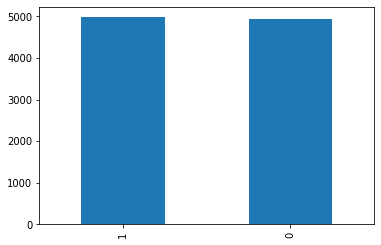

In [19]:
df.TARGET.value_counts().plot(kind='bar')

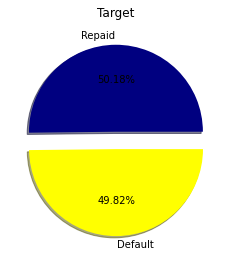

In [20]:
label = ('Repaid', 'Default')
color = ('navy','yellow')
explode = (0, 0.2)

plt.title('Target')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.2f%%',
    colors=color,
    explode=explode,
    shadow=True
)
plt.show()

Perbedaan proporsi label yang signifikan pada kasus klasifikasi dapat menyebabkan komputer/mesin tidak dapat belajar dengan baik sehingga model yang terbentuk hanya dapat mengenali label yang dominan.Ada perbedaan yang signifikan dalam proporsi label dalam dataset ini

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


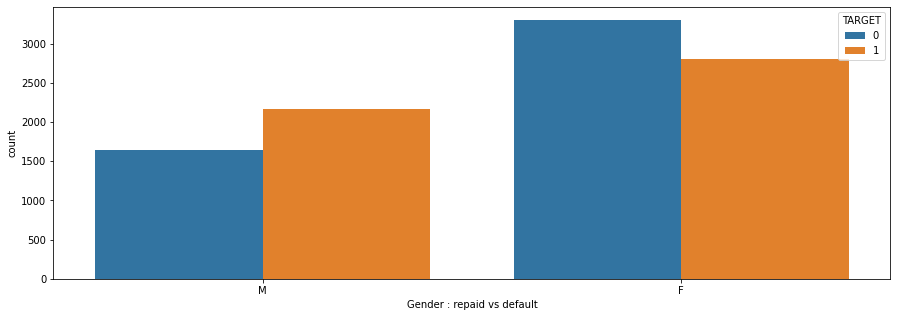

In [21]:
plt.figure(figsize = (15,5))
sns.countplot('CODE_GENDER',hue='TARGET',data=df)
plt.xlabel('Gender : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


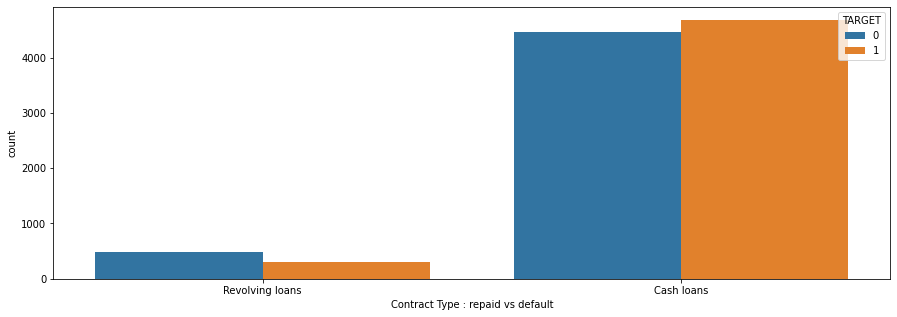

In [22]:
plt.figure(figsize = (15,5))
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=df)
plt.xlabel('Contract Type : repaid vs default')
plt.legend(frameon=True, loc=1, title='TARGET')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ab608bf10>,
      dtype=object)

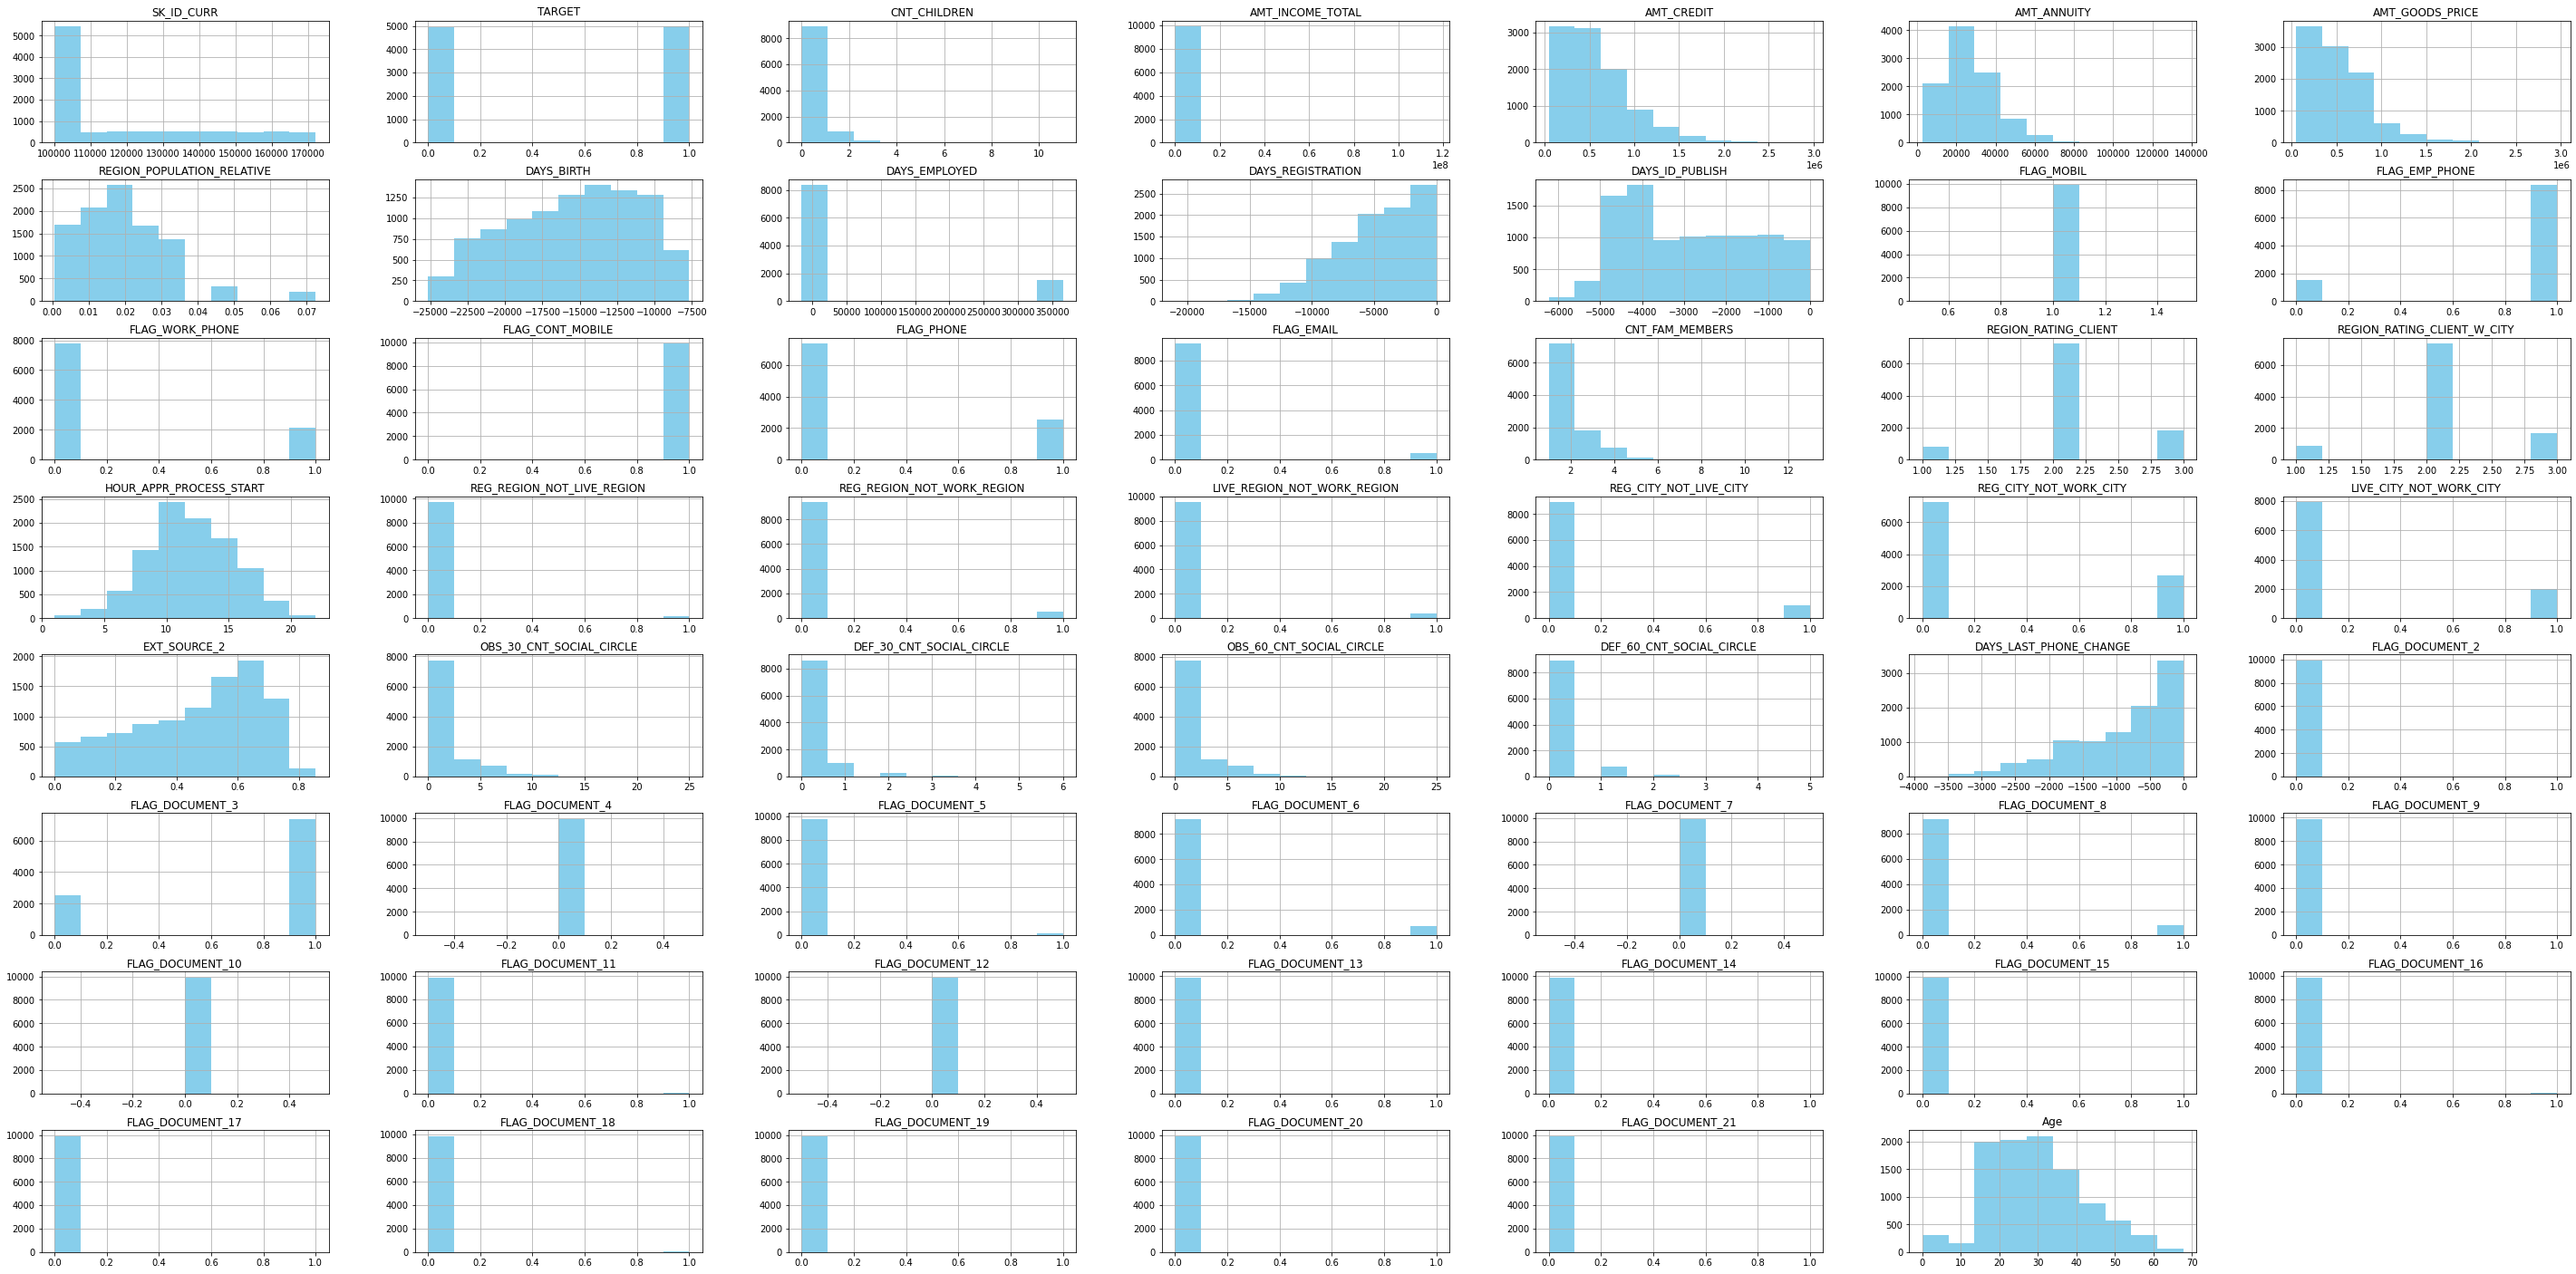

In [23]:
df.hist(figsize=(50,25),color='skyblue')

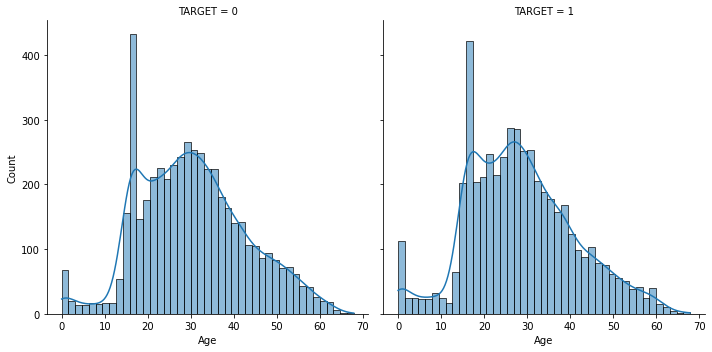

In [24]:
sns.displot(data=df, x="Age", col='TARGET', kde=True)
plt.show()

**Correlation**

In [25]:
# heatmap

# plt.figure(figsize = (100, 60))

# corr = df.corr()

# sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
# plt.show()

In [26]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
SK_ID_CURR                     0.748337
DAYS_BIRTH                     0.145661
REGION_RATING_CLIENT           0.123518
REGION_RATING_CLIENT_W_CITY    0.123476
DAYS_LAST_PHONE_CHANGE         0.104977
FLAG_DOCUMENT_3                0.083503
FLAG_EMP_PHONE                 0.083421
DAYS_ID_PUBLISH                0.081148
DAYS_REGISTRATION              0.080522
REG_CITY_NOT_WORK_CITY         0.074009
DEF_60_CNT_SOCIAL_CIRCLE       0.062696
DEF_30_CNT_SOCIAL_CIRCLE       0.061865
LIVE_CITY_NOT_WORK_CITY        0.054115
CNT_CHILDREN                   0.053037
REG_CITY_NOT_LIVE_CITY         0.052963
FLAG_WORK_PHONE                0.036954
CNT_FAM_MEMBERS                0.031764
OBS_30_CNT_SOCIAL_CIRCLE       0.030775
OBS_60_CNT_SOCIAL_CIRCLE       0.029739
FLAG_CONT_MOBILE               0.010193
FLAG_DOCUMENT_2                0.010008
AMT_INCOME_TOTAL               0.007620
REG_REGION_NOT_LIVE_REGION     0.004792
REG_REGION_NOT_WORK_REGION     0.004273


In [27]:
#checking number of unique values
df.nunique()

SK_ID_CURR            9915
TARGET                   2
NAME_CONTRACT_TYPE       2
CODE_GENDER              2
FLAG_OWN_CAR             2
                      ... 
FLAG_DOCUMENT_18         2
FLAG_DOCUMENT_19         2
FLAG_DOCUMENT_20         2
FLAG_DOCUMENT_21         2
Age                   7089
Length: 66, dtype: int64

In [28]:
# dropping columns which are not necessary for prediction

to_drop = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
           'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']

df.drop(to_drop, inplace = True, axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   9915 non-null   int64  
 1   TARGET                       9915 non-null   int64  
 2   NAME_CONTRACT_TYPE           9915 non-null   object 
 3   CODE_GENDER                  9915 non-null   object 
 4   FLAG_OWN_CAR                 9915 non-null   object 
 5   FLAG_OWN_REALTY              9915 non-null   object 
 6   CNT_CHILDREN                 9915 non-null   int64  
 7   AMT_INCOME_TOTAL             9915 non-null   float64
 8   AMT_CREDIT                   9915 non-null   float64
 9   AMT_ANNUITY                  9915 non-null   float64
 10  AMT_GOODS_PRICE              9915 non-null   float64
 11  NAME_TYPE_SUITE              9915 non-null   object 
 12  NAME_INCOME_TYPE             9915 non-null   object 
 13  NAME_EDUCATION_TYP

In [30]:
# # extracting categorical columns
# cat_df = X.select_dtypes(include = ['object'])

In [31]:
# cat_df = pd.get_dummies(cat_df, drop_first = True)

**Encoding Categorical Columns**

In [32]:
encoding = {"NAME_CONTRACT_TYPE": {"Cash loans": 0, "Revolving loans": 1}, "CODE_GENDER": {"F": 0, "M": 1}, "FLAG_OWN_CAR": {"N": 0, "Y": 1},
            "FLAG_OWN_REALTY": {"N": 0, "Y": 1}}
df.replace(encoding, inplace=True)

In [33]:
# One-hot encode the data using pandas get_dummies
dataset = pd.get_dummies(df)
dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,1,0,0,1,0,0,0,0
1,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,1,0,0,0,0
2,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,1,0,0,1,0,0,0,0
3,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,...,1,0,0,0,0,1,0,0,0,0
4,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,172107,1,0,0,0,0,0,225000.0,508495.5,26091.0,...,1,0,0,0,0,1,0,0,0,0
9996,172112,1,0,0,0,1,0,112500.0,540000.0,39424.5,...,1,0,0,0,0,1,0,0,0,0
9997,172118,1,0,1,0,1,0,135000.0,585000.0,29997.0,...,1,0,0,0,0,1,0,0,0,0
9998,172135,1,0,1,1,0,1,405000.0,640080.0,29970.0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
dataset.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_

In [35]:
# # feature selection
# bestfeatures = SelectKBest(score_func=chi2, k=10)
# fit = bestfeatures.fit(x,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x.columns)
# featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
# featureScores.columns = ['Features', 'Score']
# print('The features that correlate well with target feature:\n')
# featureScores.sort_values(by=['Score'], ascending=False)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 82 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   SK_ID_CURR                                         9915 non-null   int64  
 1   TARGET                                             9915 non-null   int64  
 2   NAME_CONTRACT_TYPE                                 9915 non-null   int64  
 3   CODE_GENDER                                        9915 non-null   int64  
 4   FLAG_OWN_CAR                                       9915 non-null   int64  
 5   FLAG_OWN_REALTY                                    9915 non-null   int64  
 6   CNT_CHILDREN                                       9915 non-null   int64  
 7   AMT_INCOME_TOTAL                                   9915 non-null   float64
 8   AMT_CREDIT                                         9915 non-null   float64
 9   AMT_ANNU

In [37]:
# from sklearn.model_selection import train_test_split

# training_data, testing_data = train_test_split(X, test_size=0.2, random_state=42)

In [38]:
# training_data.to_csv('data_train.csv', index = False)
# testing_data.to_csv('data_test.csv', index = False)

In [39]:
#Separating the feature and target columns
X = dataset.drop('TARGET', axis = 1)
y = dataset['TARGET']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

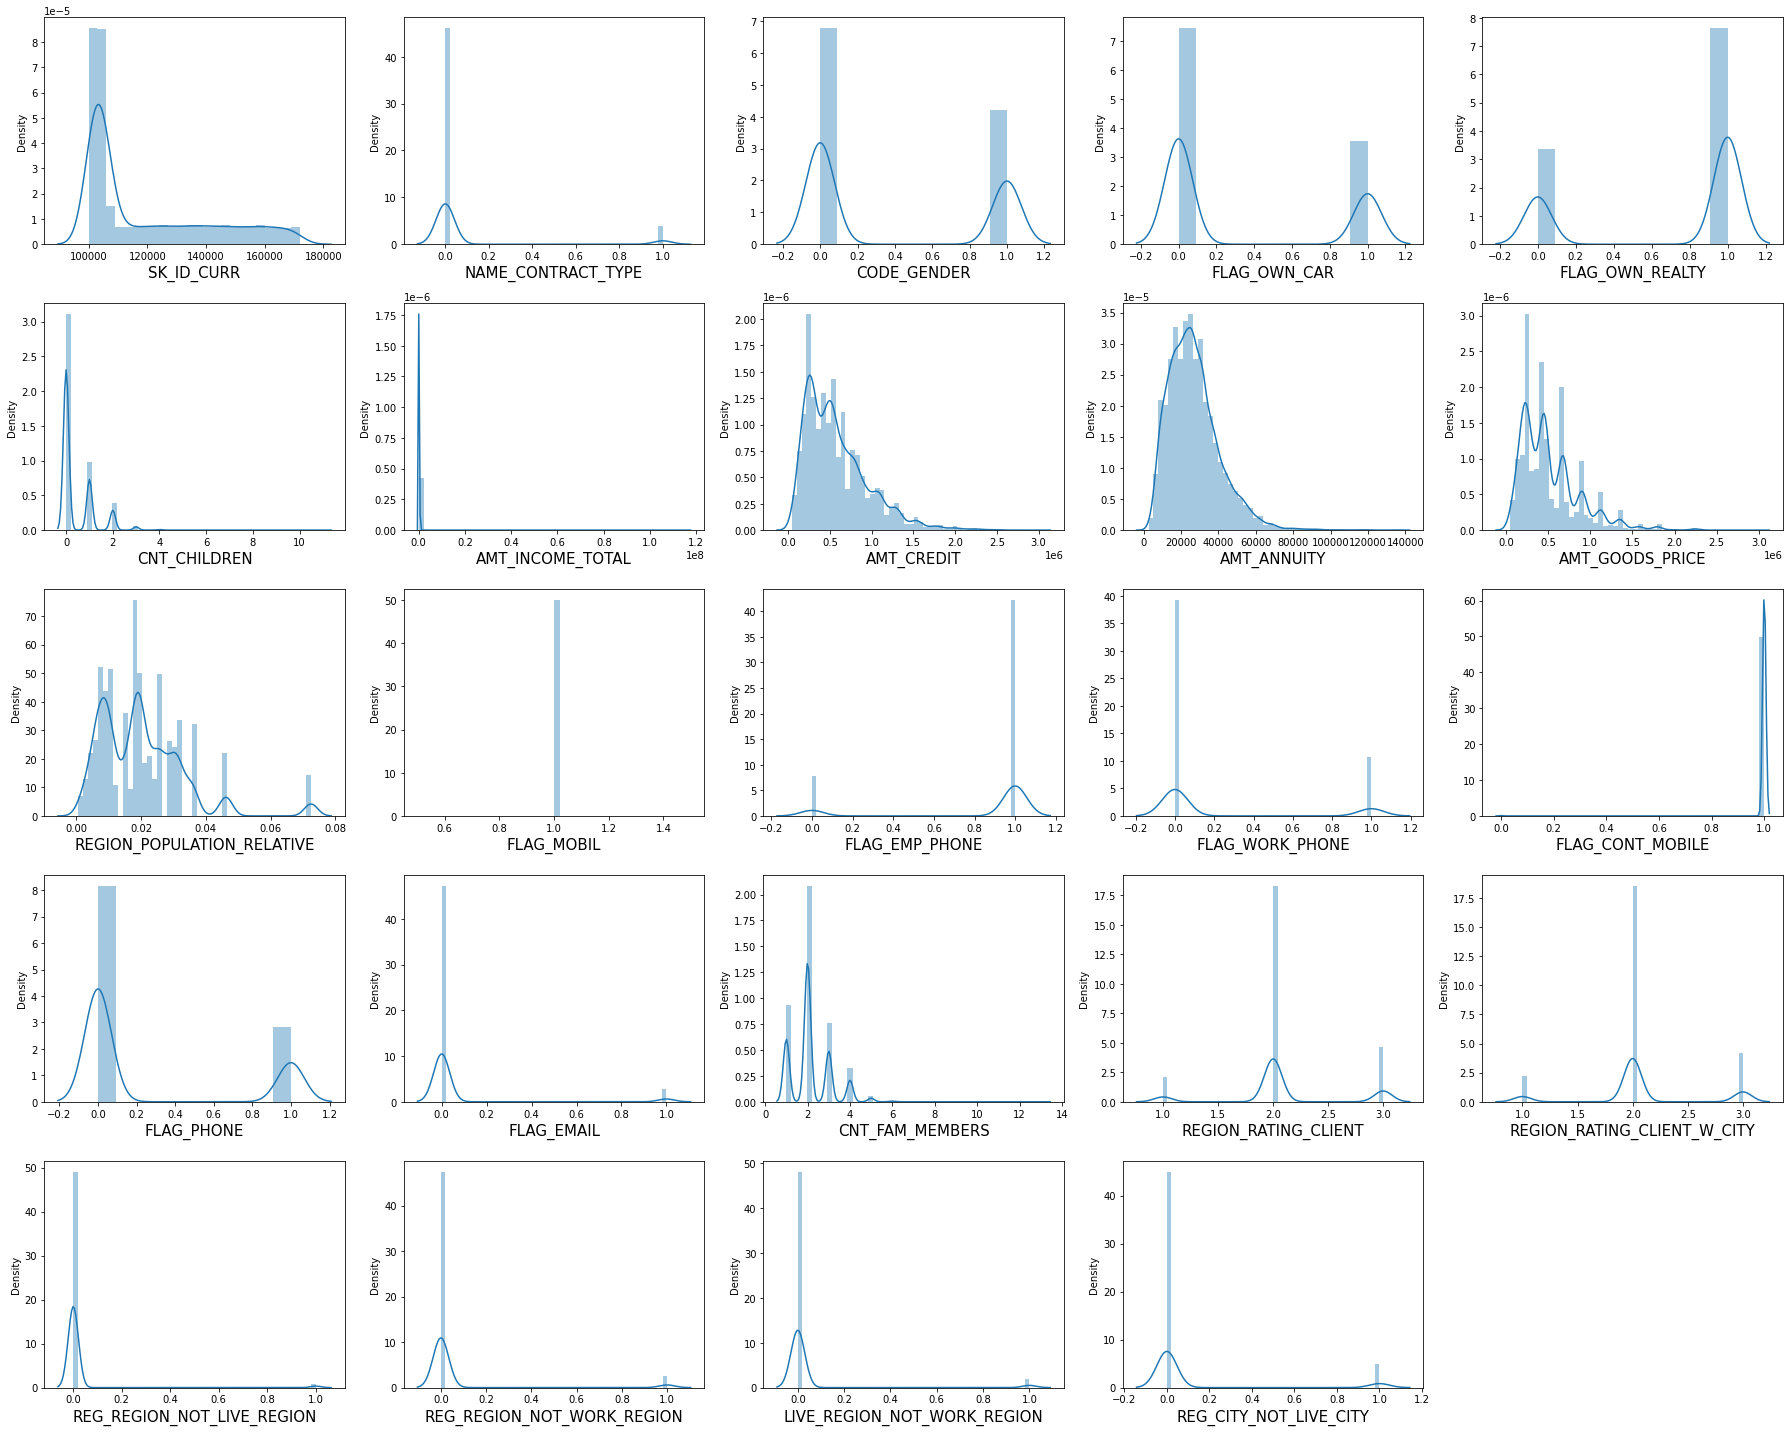

In [40]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outlier Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

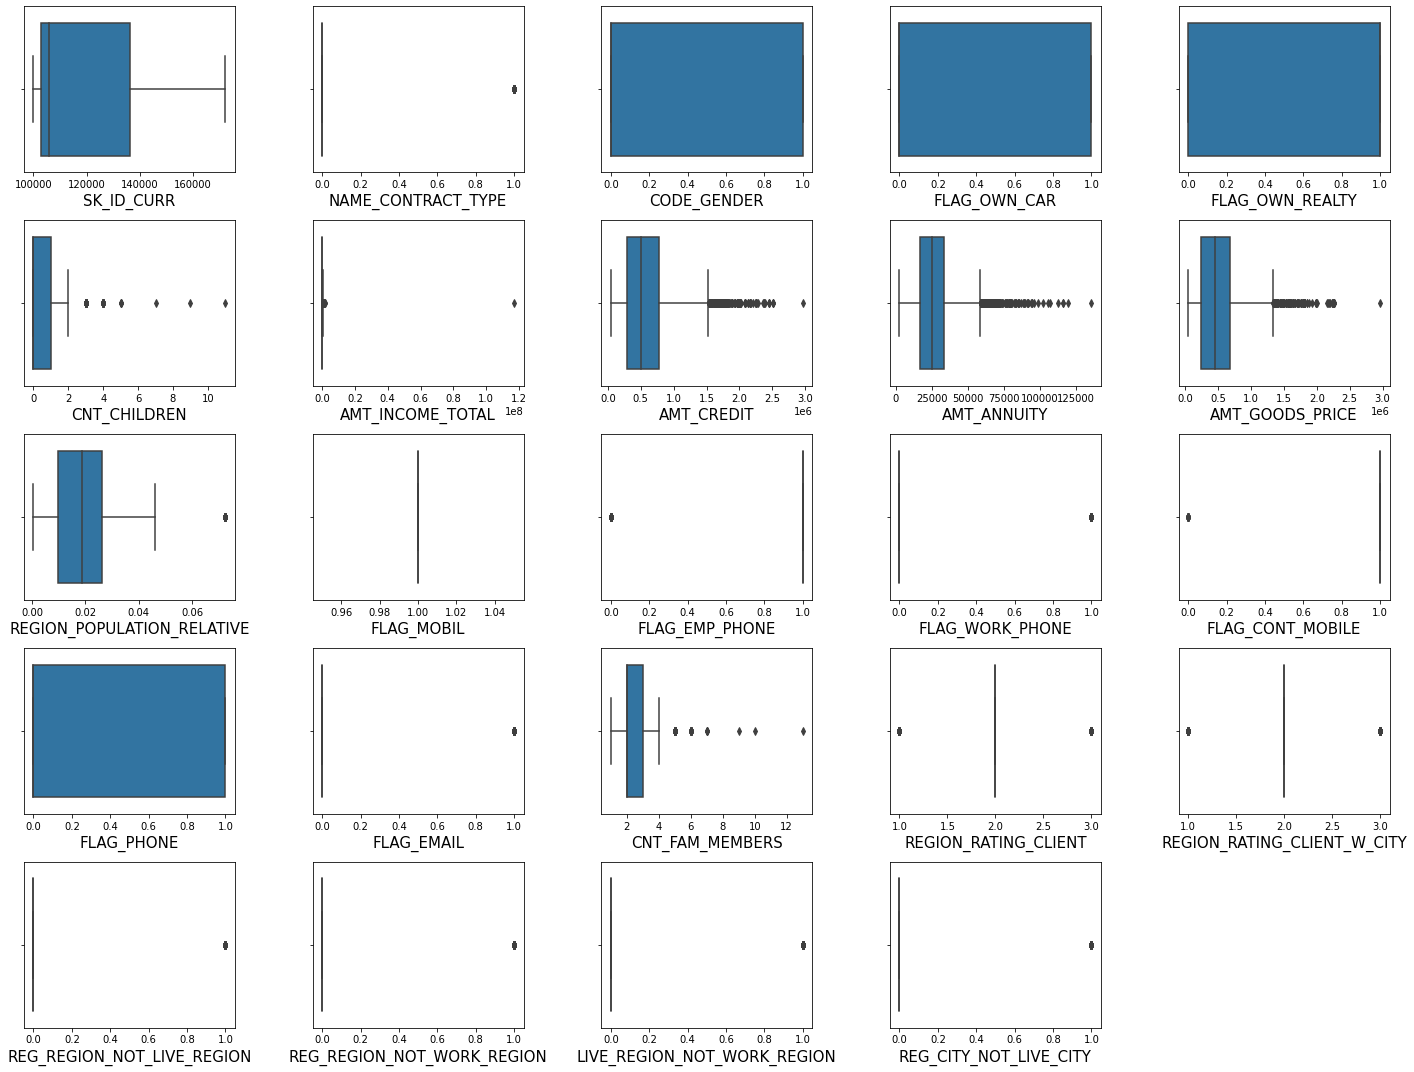

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

Handling Outliers

In [42]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS']
for i in X[outlier_list]:
    X[i]=treat_outlier(X[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

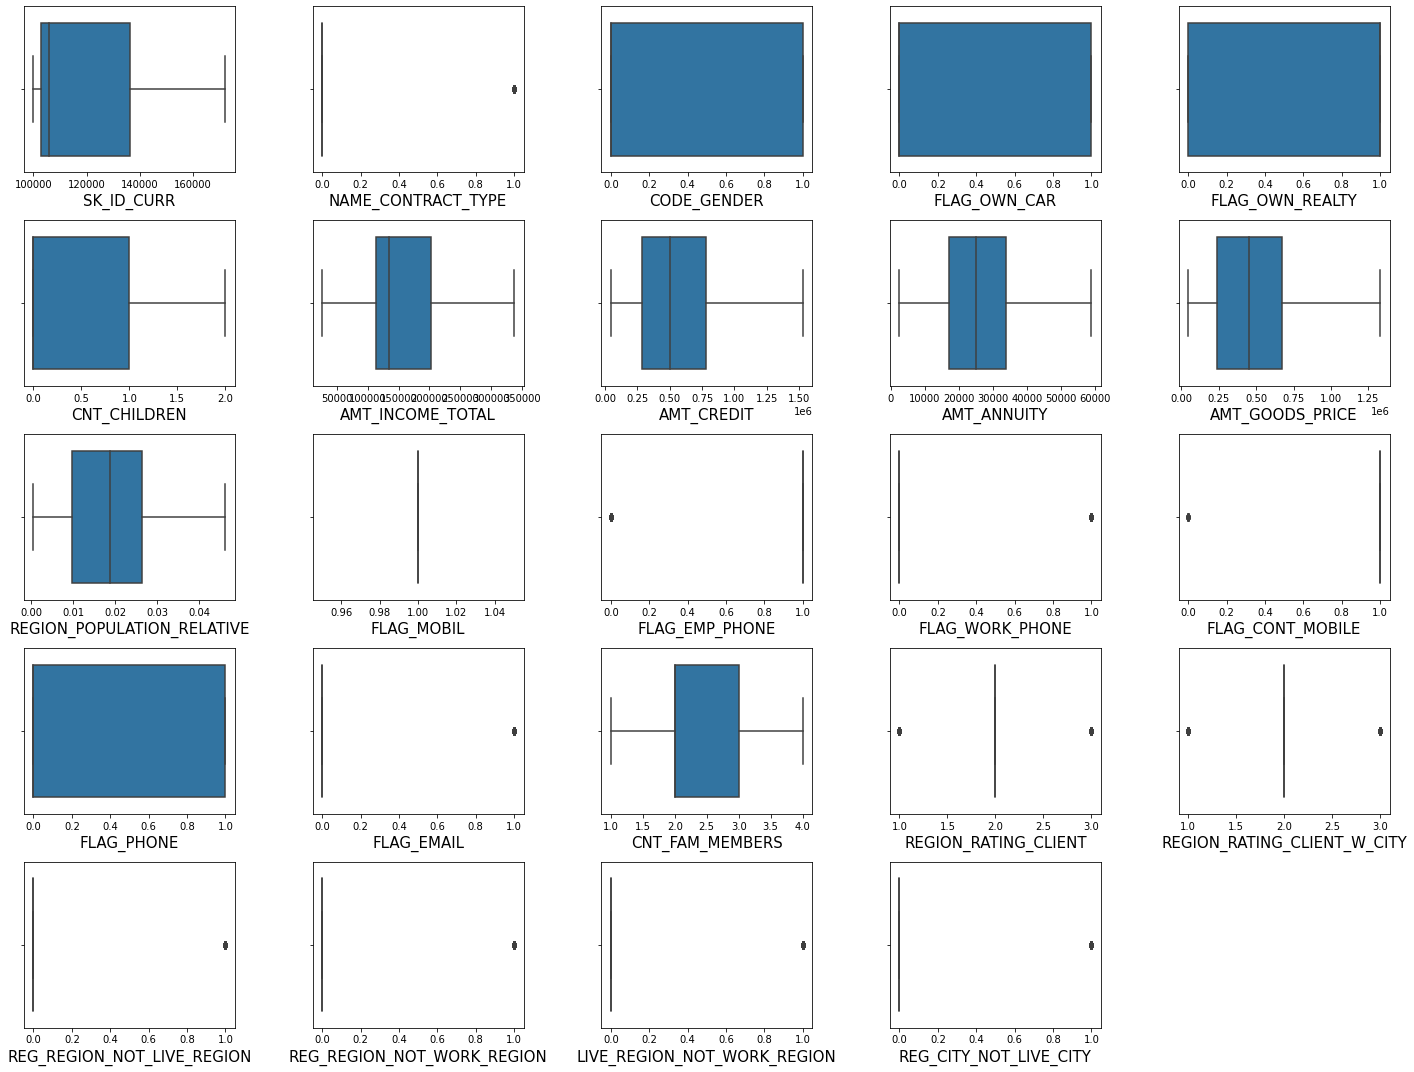

In [43]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [44]:
#from sklearn.model_selection import train_test_split

#training_data, testing_data = train_test_split(X, test_size=0.2, random_state=42)

In [45]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
#training_data.to_csv('data_train.csv', index = False)
#testing_data.to_csv('data_test.csv', index = False)

In [47]:
# X.to_csv('data_prepro.csv', index = False)
#X_test.to_csv('data_test.csv', index = False)

**Normalization**

In [48]:
# num_df = X_train.select_dtypes(include = ['int64','float64'])

In [49]:
# # Scaling the numeric values in the dataset

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(num_df)

In [50]:
# scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
# scaled_num_df.head()

In [51]:
# X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [52]:
# X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [53]:
# X_train.head()

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(random_state=42)
clf1.fit(X_train, y_train)
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([('classifier', clf1)])
params = [param1]
gs_rfc = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_rfc.best_params_

{'classifier': RandomForestClassifier(max_depth=5, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100}

In [61]:
# Test data performance
from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(gs_rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_rfc.predict(X_test), y_test))

Test Accuracy Score: 0.9531013615733737
Test Precision: 0.908102766798419
Test Recall: 1.0


In [62]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_rfc.predict(X_test)
rfc_train_acc = accuracy_score(y_train, gs_rfc.predict(X_train))
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 0.960287443267776
Test accuracy of Random Forest Classifier is : 0.9531013615733737
[[971   0]
 [ 93 919]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       971
           1       1.00      0.91      0.95      1012

    accuracy                           0.95      1983
   macro avg       0.96      0.95      0.95      1983
weighted avg       0.96      0.95      0.95      1983



In [ ]:
#X_train.columns.to_list()

In [ ]:
# feature_imp = pd.Series(clf1.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# feature_imp

SK_ID_CURR                0.633658
EXT_SOURCE_2              0.053569
DAYS_LAST_PHONE_CHANGE    0.027023
Age                       0.025720
AMT_ANNUITY               0.025027
                            ...   
FLAG_DOCUMENT_12          0.000000
FLAG_MOBIL                0.000000
FLAG_DOCUMENT_7           0.000000
FLAG_DOCUMENT_4           0.000000
FLAG_DOCUMENT_10          0.000000
Length: 81, dtype: float64

Text(0.5, 1.0, 'Feature Importances')

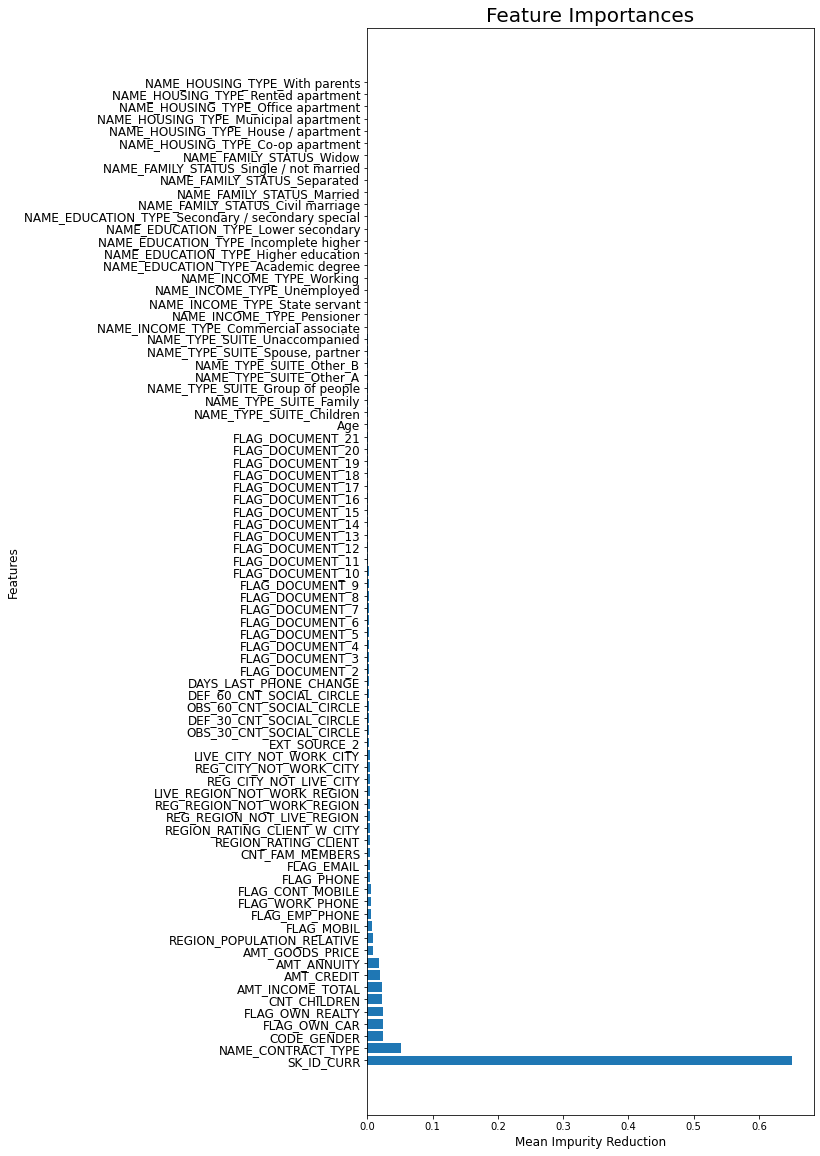

In [67]:
tree_feature =  pd.Series(clf1.feature_importances_, X.columns).sort_values(ascending = False)
plt.figure(figsize = (8,20))
plt.barh(X.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature Importances', fontsize = 20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


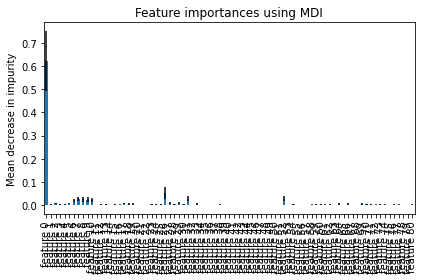

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()